In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

In [2]:
login = pd.read_json("logins.json")

In [3]:
login.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.4 MB


In [4]:
#login.login_time_index=pd.DatetimeIndex(login.login_time)
login.reset_index(inplace=True)
login.set_index(pd.DatetimeIndex(login['login_time']), inplace=True)

In [5]:
months = mdates.MonthLocator()  
day = mdates.DayLocator() 
hours = mdates.HourLocator()

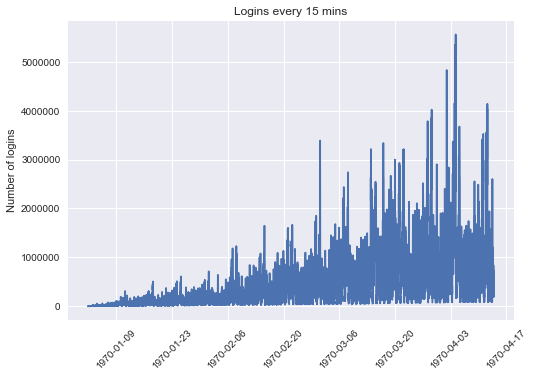

In [6]:
login_15=login.resample("15Min").sum()
login_15['Datetime'] = login_15.index
plt.plot(login_15['Datetime'],login_15['index'])
plt.title("Logins every 15 mins")
plt.ylabel("Number of logins")
plt.xticks(rotation=45)
plt.show()

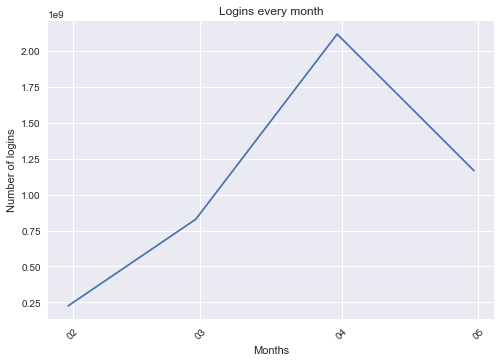

In [7]:
login_M=login.resample("M").sum()
login_M['Datetime'] = login_M.index
plt.plot(login_M['Datetime'],login_M['index'])
plt.title("Logins every month")
plt.ylabel("Number of logins")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m'))
plt.xlabel("Months")
plt.show()

#### User logins increase as the months progress and peak in April but daily and weekly patterns are hard to discern from this graph

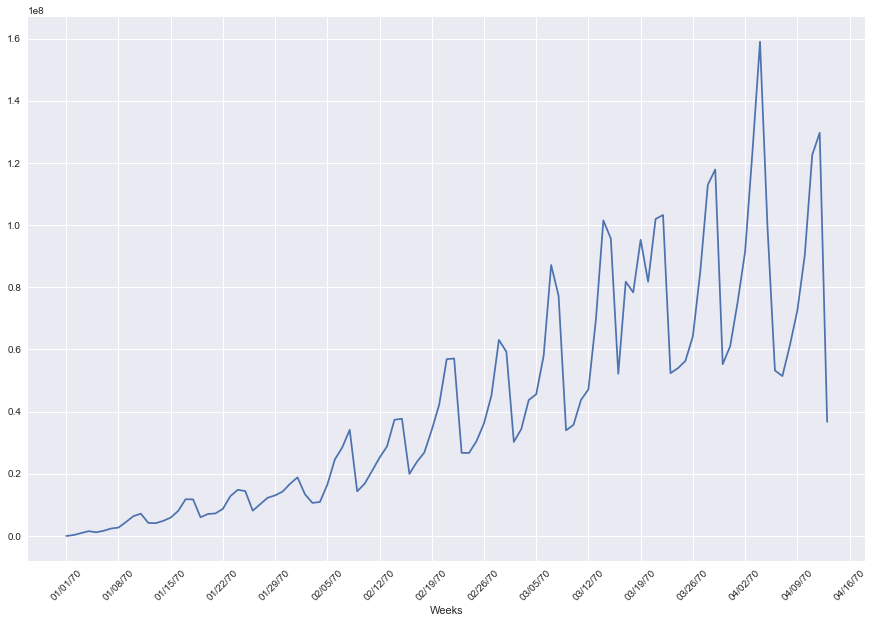

In [8]:
login_D=login.resample("D").sum()
login_D['Datetime'] = login_D.index
plt.figure(figsize=(15,10))
plt.plot(login_D['Datetime'],login_D['index'])
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%D'))
plt.xlabel("Weeks")
plt.show()

#### If we look at the number of logins per day, we see that there might be a weekly pattern, rising towards the weekend and falling mid-week

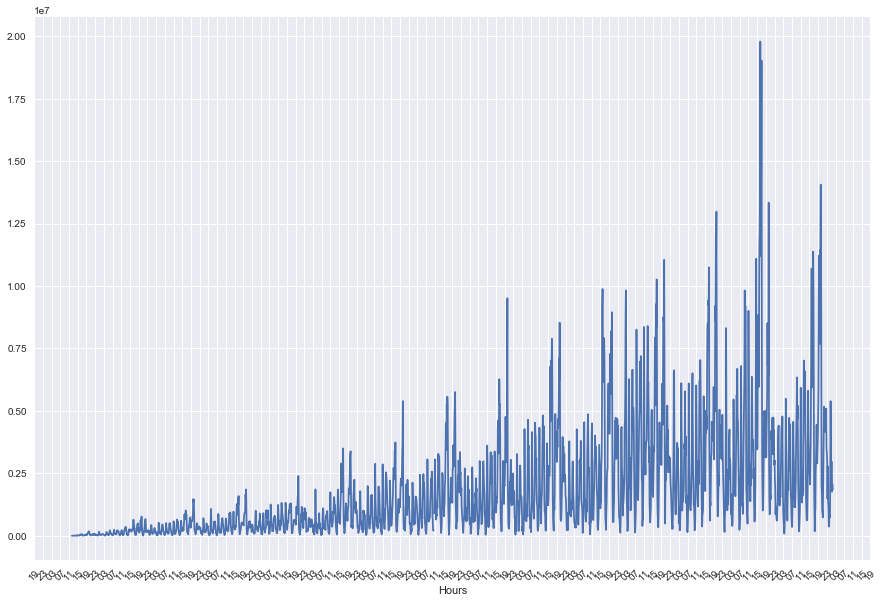

In [9]:
login_D=login.resample("H").sum()
login_D['Datetime'] = login_D.index
plt.figure(figsize=(15,10))
plt.plot(login_D['Datetime'],login_D['index'])
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=28))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
plt.xticks(rotation=45)
plt.xlabel("Hours")
plt.show()

#### If we look at the patterns for a single day (here April 7, 1970), we see that logins have a daily pattern. Peaking  in the night. 